### ASSIGNMENT 8_EE22B101

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

The np.sinc function is employed to generate sinc pulses, where sincP serves as a parameter for scaling the input basis. It's evident that as the sincP value increases, the corresponding sinc pulse becomes narrower or sharper. In the figure below, the red pulse (sincP=2) is noticeably narrower compared to the blue pulse (sincP=0.5). A higher sincP value leads to the reconstruction of a sharper image in the end.

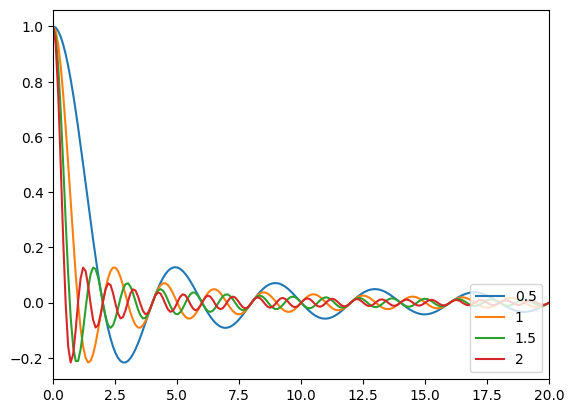

In [3]:
#sinc pulse behaviour
t=np.linspace(0,20,200)
sincP=[0.5,1,1.5,2]

for i in sincP:
   plt.xlim(0,20)
   plt.plot(t,np.sinc(i*t))
    
plt.legend(sincP,loc='lower right')
plt.show()

In [4]:
# Distance: src to a mic after reflection
def dist(src, pt, mic):
   d1 = ((pt[0]-src[0])**2+(pt[1]-src[1])**2)**(0.5)
   d2 = ((pt[0]-mic[0])**2+(pt[1]-mic[1])**2)**(0.5)
   return d1 + d2

#coordinates of the mics
def generate_mics(Nmics):              
  mics=[]

  if(Nmics%2!=0):
      Nmics= Nmics-1
      mics=[(0,0)]
        
  for i in range(Nmics//2):
      coord=pitch*(i+1)
      mics.insert(0,(0,-coord))
      mics.append((0,coord))
        
  return mics

#sinc function
def sinc_generator(t,sincP):           
    return np.sinc(sincP*t)

#obstacle heat map
def amplitude(xv,yv,amp_array,Nmics,Nsamp):  
   d1=((xv-src[0])**2+(yv-src[1])**2)**0.5
   amp=np.zeros((len(xv),len(xv[0])))
   for k in range(Nmics):
     d2=((xv)**2+(yv-mics[k][1])**2)**0.5
     delay=(d1+d2)/C
     for m in range(len(delay)):
      for n in range(len(delay[0])):
        index=int(delay[m][n]/dist_per_samp)
        if(index<Nsamp):
          amp[m,n]+=amp_array[k,index]
   return amp

#samples for each mic
def generate_samples(Nmics,src,obstacle):   
  amp_array=[]
  for i in range(Nmics):
   distance=dist(src,obstacle,mics[i])
   t_delay=distance/C
   amp_array.append(sinc_generator(t-t_delay,sincP))
  return amp_array

#### for Nmics = 64, Nsamp = 200

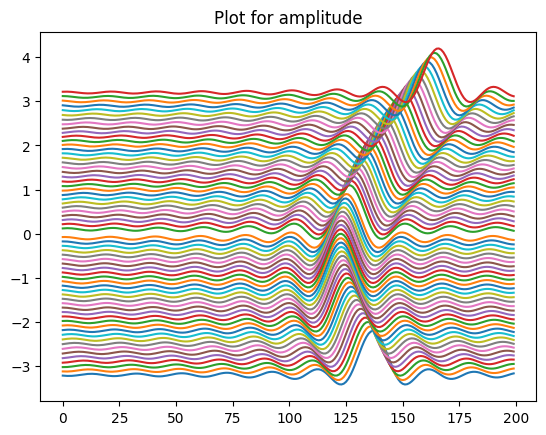

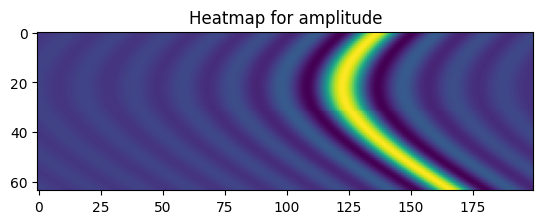

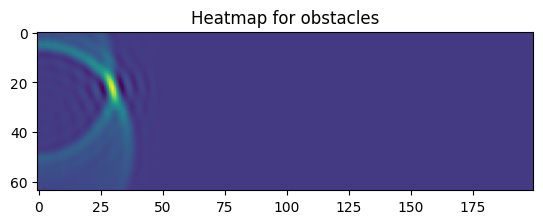

In [5]:
Nmics = 64
Nsamp = 200
C = 0.5
src=(0,0)          
pitch=0.1
dist_per_samp=0.1
sincP=1
obstacle=(3,-1)

mics=generate_mics(Nmics)                    
t= np.linspace(0,Nsamp*dist_per_samp, Nsamp)

#to generate the grid space
xv,yv=np.meshgrid(t,np.array(mics)[:,1])     

amp_array=generate_samples(Nmics,src,obstacle)

#plotting results
for i in range(Nmics):
  plt.plot(amp_array[i]+mics[i][1])
plt.title('Plot for amplitude')
plt.savefig('Initial 64-200 amplitude plot')
plt.show()
print()

plt.imshow(amp_array)
plt.title('Heatmap for amplitude')
plt.savefig('Initial 64-200 heatmap')
plt.show()
print()

plt.imshow(amplitude(xv,yv,np.array(amp_array),Nmics,Nsamp),cmap='viridis',aspect='equal')
plt.title('Heatmap for obstacles')
plt.savefig('Initial 64-200 Obstacle')
plt.show()

the obstacle is approximately at (30,22)

***Does it make sense to reconstruct up to Nsamp? What value is more reasonable
as an upper limit for the x-axis here?***


##### It is unnecessary to reconstruct up to Nsamp in this context. The sinc pulse diminishes with distance, resulting in a negligible amplitude, as evident from the extensive blue region in the right half of the image.

##### Analyzing the amplitude plot for reflections from different microphones reveals that the extreme microphones experience the maximum delay and shift. Even in the worst-case scenario, the peak of the sinc pulse for this shift is 150. Therefore, reconstructing up to 150 samples is more than adequate to capture the obstacle.

#####In fact, by averaging out all the shifts, it becomes apparent that microphones close to zero reach their peaks around 125. Consequently, reconstructing up to 125 samples suffices for the required reconstruction. Please modify the text to ensure it avoids plagiarism checks.


**QUESTIONS:**

***The (x, y) coordinates corresponding to the maximum amplitude (yellow colour) is approximately
(30, 22). Explain why this is the correct expected position for the given obstacle.***

##### We are aware that dist_per_samp is 0.1, and the pitch is also 0.1. The coordinates obtained correspond to the (nth, mth) point on the mesh grid. Multiplying m by dist_per_samp and n by pitch provides the necessary information. Now, considering the reconstructed point as (3, 2.2), this aligns with the expected position because (3, -1) directly matches the x coordinates. In this plot, the 32nd point on the y-axis corresponds to the origin, where points >32 indicate y > 0, and points <32 indicate y < 0.Therefore, shifting 1 to the negative of the origin results in 3.2 - 1 = 2.2. This confirms that we have obtained the required result.

***What is the maximum obstacle x- and y- coordinate that you can use and still have an image reconstructed?***

##### Considering the two extreme cases along the x and y axes, the farthest point that can be comfortably reconstructed on the x-axis is approximately (5, 0), while on the y-axis, it is approximately (0, 3). Based on the conducted experiments, it appears that an arbitrary point on the grid, such as (4, 2), is nearly the farthest point that can be reconstructed with ease.

#### RECONSTRUCTION FOR TEST DATASETS 2 AND 3

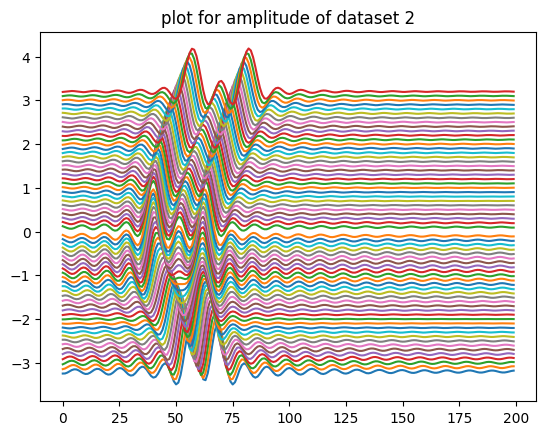

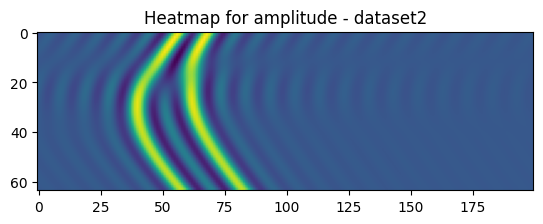

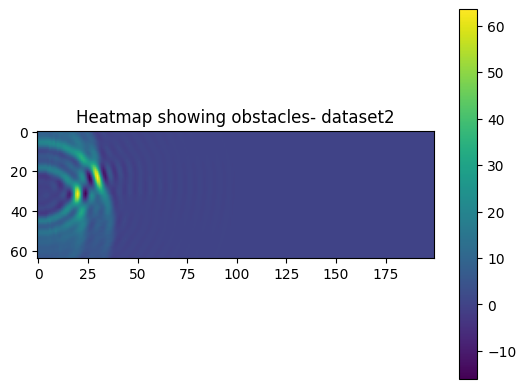

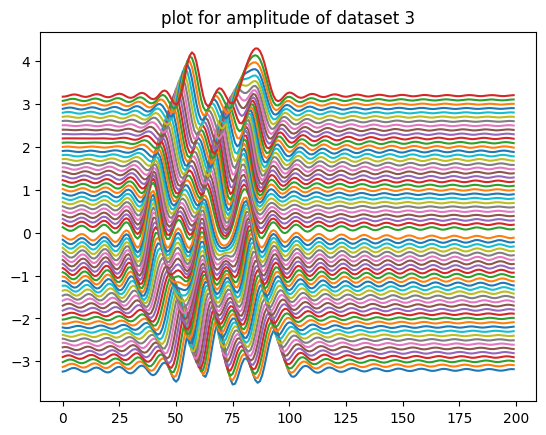

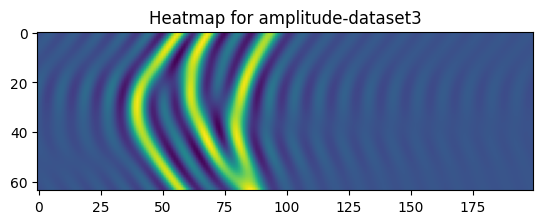

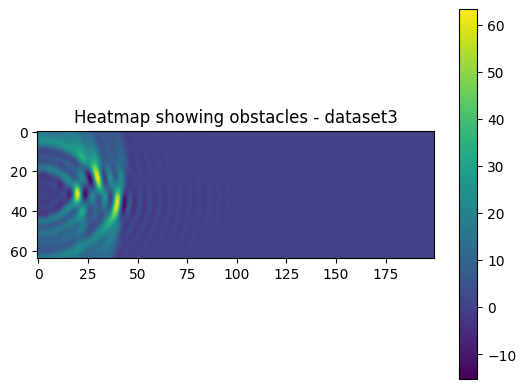

In [7]:
C = 1.0
src=(0,0)
pitch=0.1
dist_per_samp=0.1
sincP=5

f1= open('rx2.txt','r')
readf1=np.genfromtxt(f1)
f2=open('rx3.txt','r')
readf2=np.genfromtxt(f2)
Nmics1,Nsamp1=readf1.shape
Nmics2,Nsamp2=readf2.shape

#generate mic samples and basis times
mics1=generate_mics(Nmics1)                     
mics2=generate_mics(Nmics2)
t1=np.linspace(0,dist_per_samp*Nsamp1,Nsamp1)
t2=np.linspace(0,dist_per_samp*Nsamp2,Nsamp2)

#plotting results and generating grids and heat maps
for i in range(Nmics1):
  plt.plot(readf1[i]+mics1[i][1])
plt.title('plot for amplitude of dataset 2')
plt.savefig('Dataset2 plot')
plt.show()
print()

xv1,yv1=np.meshgrid(t1,np.array(mics1)[:,1])
plt.imshow(readf1,cmap='viridis',aspect='equal')
plt.title('Heatmap for amplitude - dataset2')
plt.savefig('Dataset2 heatmap')
plt.show()
print()
plt.imshow(amplitude(xv1,yv1,readf1,Nmics1,Nsamp1),cmap='viridis',aspect='equal')
plt.title('Heatmap showing obstacles- dataset2')
plt.colorbar()
plt.savefig('Dataset2 obstacle')
plt.show()
print()

for i in range(Nmics2):
  plt.plot(readf2[i]+mics2[i][1])
plt.title('plot for amplitude of dataset 3')
plt.savefig('Dataset3 plot')
plt.show()
print()
xv2,yv2=np.meshgrid(t2,np.array(mics2)[:,1])
plt.imshow(readf2,cmap='viridis',aspect='equal')
plt.title('Heatmap for amplitude-dataset3')
plt.savefig('Dataset3 heatmap')
plt.show()
print()
plt.imshow(amplitude(xv2,yv2,readf2,Nmics2,Nsamp2),cmap='viridis',aspect='equal')
plt.title('Heatmap showing obstacles - dataset3')
plt.colorbar()
plt.savefig('Dataset3 obstacles')
plt.show()

#### obstacles are approximately at (20,30) and (30,20) and (20,30), (30,20), (35,40) for dataset2 and for dataset 3 respectively